In [ ]:
!pip install lazypredict
import lazypredict

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import lazypredict
import xgboost as xg
from sklearn.preprocessing import PowerTransformer
import pickle

In [ ]:
import pandas as pd
crab=pd.read_csv("/content/CrabAgePrediction.csv")
crab

,Sex,Length,D0ameter,He0ght,We0ght,Shucked We0ght,V0scera We0ght,Shell We0ght,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,0,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,0,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,0,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,0,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [ ]:
crab.isnull().any()

Sex               False
Length            False
D0ameter          False
He0ght            False
We0ght            False
Shucked We0ght    False
V0scera We0ght    False
Shell We0ght      False
Age               False
dtype: bool

In [ ]:
crab.isnull().sum()

Sex               0
Length            0
D0ameter          0
He0ght            0
We0ght            0
Shucked We0ght    0
V0scera We0ght    0
Shell We0ght      0
Age               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
one = LabelEncoder()

In [ ]:
crab["Sex"]=one.fit_transform(crab["Sex"])

In [ ]:
crab

,Sex,Length,D0ameter,He0ght,We0ght,Shucked We0ght,V0scera We0ght,Shell We0ght,Age
0,1,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,2,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,0,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,1,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,0,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,1,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,1,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,0,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,0,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [ ]:
crab.describe()

,Sex,Length,D0ameter,He0ght,We0ght,Shucked We0ght,V0scera We0ght,Shell We0ght,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.051888,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.826327,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,0.000000,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.000000,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,2.000000,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


<ipython-input-14-bbd46b4475c3>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot('f','g',color = "violet",marker = "+" )
<ipython-input-14-bbd46b4475c3>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "c" (-> color=(0.0, 0.75, 0.75, 1)). The keyword argument will take precedence.
  plt.plot('a','c',color = "black",marker = "*" )
<ipython-input-14-bbd46b4475c3>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot('b','g',color = "orange",marker = "+" )


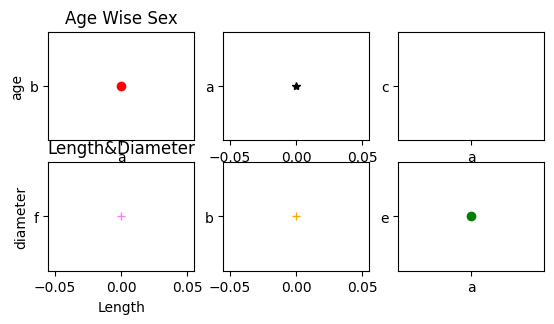

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(3,3,1)
plt.scatter('a','b',color = "red")
plt.xlabel("sex")
plt.ylabel("age")
plt.title("Age Wise Sex")
plt.subplot(3,3,4)
plt.plot('f','g',color = "violet",marker = "+" )
plt.xlabel("Length")
plt.ylabel("diameter")
plt.title("Length&Diameter")
plt.subplot(3,3,3)
plt.bar('a','c')
plt.subplot(3,3,2)
plt.plot('a','c',color = "black",marker = "*" )
plt.subplot(3,3,5)
plt.plot('b','g',color = "orange",marker = "+" )
plt.subplot(3,3,6)
plt.scatter('a','e',color = "green")

In [ ]:
data = {
    'Sex': [1, 2, 3, 0, 5],
    'Length': [1.4, 0.8,1.0, 1.1, 0.8]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
x = df.drop('Sex', axis=1)
y = df['Sex']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


In [ ]:
x_train

,Length
4,0.8
2,1.0
0,1.4
3,1.1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = r2_score(y_test, y_pred)
accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

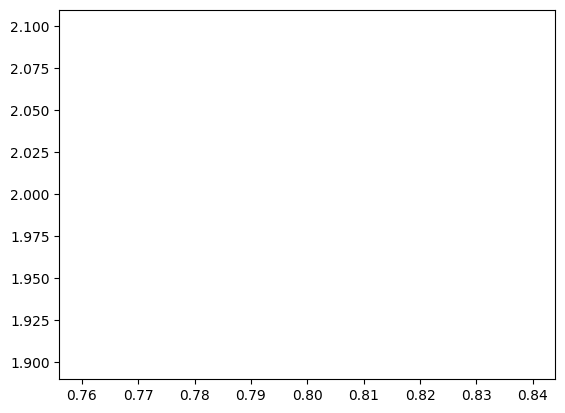

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
pf = PolynomialFeatures(degree = 4)
xpoly = pf.fit_transform(x_train)
pf.fit(x_train,y_train)
pr = LinearRegression()
pr.fit(x_test, y_test)
ppred = pr.predict(x_test)
plt.plot(x_test,ppred)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Print RMSE
print(f"Root Mean Square Error (RMSE): {rmse}")


Root Mean Square Error (RMSE): 2.1399999999999997


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(x_train,y_train)
dtpred = dt.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
acc = r2_score(y_test,dtpred)
mse = mean_squared_error(y_test,dtpred)
mae = mean_absolute_error(y_test,dtpred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective = 'reg:linear',n_estimators = 10, seed = 123)
xgb_r.fit(x_train, y_train)
pred = xgb_r.predict(x_test)
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test,pred))
print("RMSE : %f" %(rmse))

RMSE : 2.444119


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:33:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
acc = r2_score(y_test,dtpred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
mse = mean_squared_error(y_test,dtpred)

In [ ]:
mse

9.0

In [ ]:
mae = mean_absolute_error(y_test,dtpred)

In [ ]:
mae

3.0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define your Random Forest model
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    # Add more hyperparameters as needed
}

# Create a GridSearchCV object
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object with your training data
rf_grid.fit(x_train, y_train)

# Now, you can make predictions
ppp = rf_grid.predict(x_test)



Fitting 4 folds for each of 9 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
acc = r2_score(y_test,ppp)
acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [ ]:
acc = r2_score(y_test,pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
acc

nan

In [ ]:
import pickle
pickle.dump(rf_grid,open("crab.pkl","wb"))